In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from randword.randword import randword

print("done")

done


# Training Set

In [5]:
df_train = pd.read_csv('train.csv')
df_train["train_test"] = 1
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# Testing Set

In [6]:
df_test = pd.read_csv('test.csv')
df_test["train_test"] = 0
df_test["Survived"] = np.NaN

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,NaN


# EDA

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


## Categorical vs Numeric

In [9]:
categorical = df_train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
numeric = df_train[['Age','SibSp','Parch','Fare']]

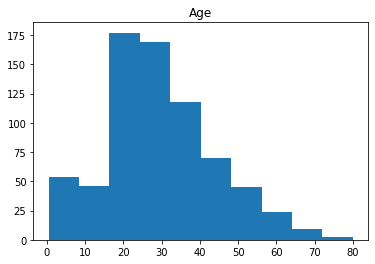

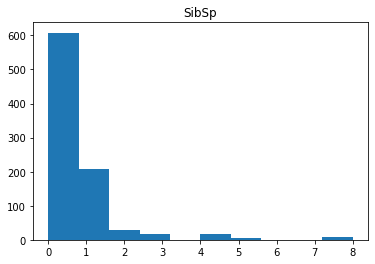

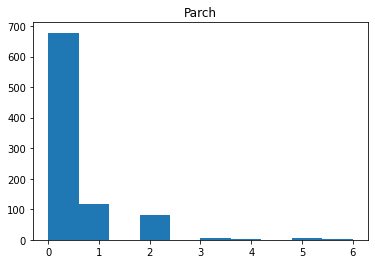

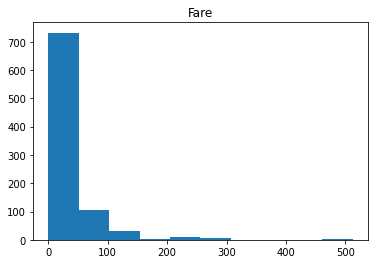

In [10]:
for i in numeric.columns:
    plt.hist(numeric[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

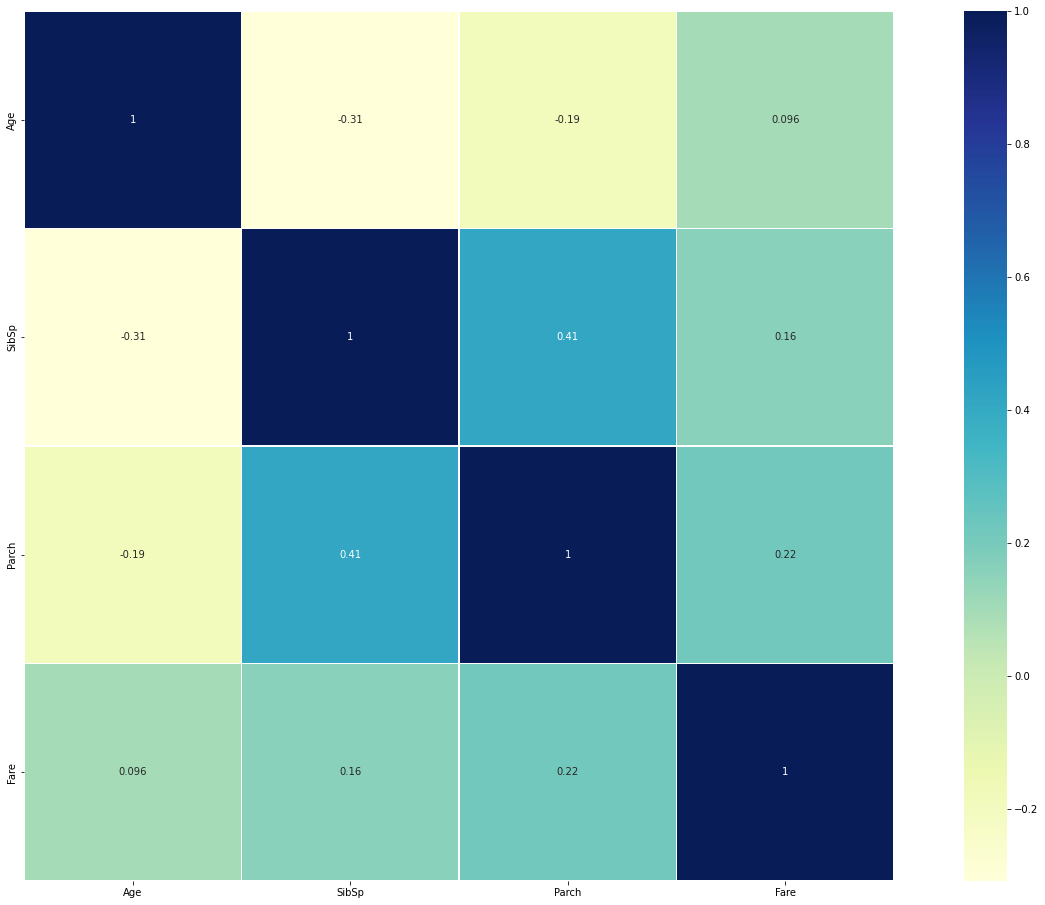

In [11]:
f, ax = plt.subplots(figsize = [25,16])
sns.heatmap(numeric.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

In [12]:
pd.pivot_table(df_train, index='Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


C:\Users\silib\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


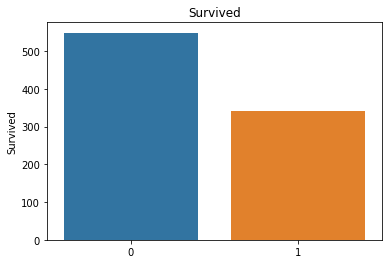

C:\Users\silib\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


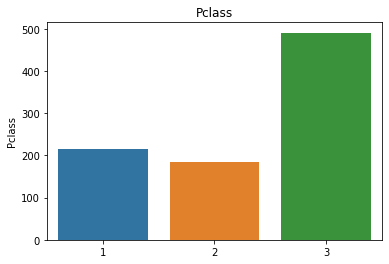

C:\Users\silib\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


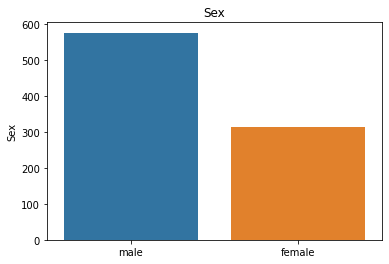

C:\Users\silib\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


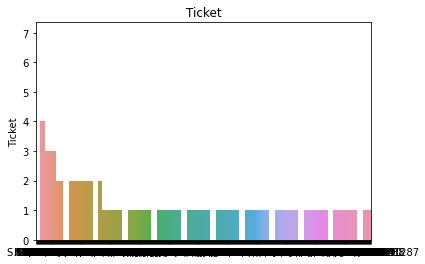

C:\Users\silib\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


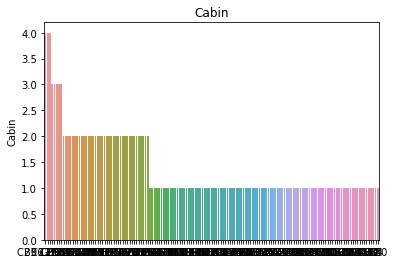

C:\Users\silib\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


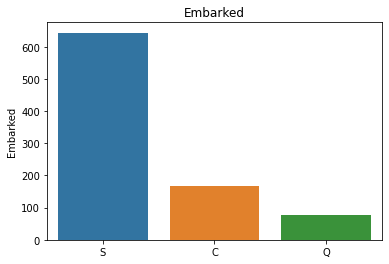

In [13]:
for i in categorical.columns:
    sns.barplot(categorical[i].value_counts().index, categorical[i].value_counts()).set_title(i)
    plt.show()

In [14]:
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [15]:
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))

Sex       female  male
Survived              
0             81   468
1            233   109


In [78]:
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [17]:
df_train["cabin_letter"] = df_train.Cabin.apply(lambda x : str(x)[0])
df_train['cabin_multiple'] = df_train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [18]:
pd.pivot_table(df_train, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [19]:
pd.pivot_table(df_train,index='Survived',columns='cabin_letter', values = 'Name', aggfunc='count')

cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [20]:
df_train['numeric_ticket'] = df_train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [21]:
pd.pivot_table(df_train,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [22]:
df_train['name_title'] = df_train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [23]:
pd.pivot_table(df_train,index='Survived',columns='name_title', values = 'Ticket', aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [24]:
def title_groups(x):
    if x == "the Countess" or x == "Sir" or x == "Mlle" or x == "Mme" or x == "Lady":
        return "Royalty"
    elif x == "Capt" or x == "Don" or x == "Jonkheer" or x == "Rev":
        return "AlmostRoyalty"
    elif x == "Col" or x == "Major":
        return "Military"
    else:
        return x

In [25]:
df_train['name_title'] = df_train.name_title.apply(title_groups)

In [26]:
pd.pivot_table(df_train,index='Survived',columns='name_title', values = 'Ticket', aggfunc='count')

name_title,AlmostRoyalty,Dr,Master,Military,Miss,Mr,Mrs,Ms,Royalty
Survived,,,,,,,,,
0,9.0,4.0,17.0,2.0,55.0,436.0,26.0,NaN,NaN
1,NaN,3.0,23.0,2.0,127.0,81.0,99.0,1.0,6.0


In [27]:
df_train['ticket_letters'] = df_train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [28]:
pd.set_option("max_rows", 6)
df_train['ticket_letters'].value_counts()


0       665
pc       60
ca       41
       ... 
fa        1
as        1
sca4      1
Name: ticket_letters, Length: 29, dtype: int64

# Data Preprocessing

In [29]:
all_data = pd.concat([df_train, df_test])

In [30]:
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_letter'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
all_data['name_title'] = all_data.name_title.apply(title_groups)

all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_letter,cabin_multiple,numeric_ticket,name_title,ticket_letters
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,n,0,0,Mr,a5
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,1,0,Mrs,pc
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,n,0,0,Miss,stono2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,1,1,Mrs,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,n,0,1,Mr,0


In [31]:
all_data.Age = all_data.Age.fillna(df_train.Age.median())
all_data.Fare = all_data.Fare.fillna(df_train.Fare.median())
all_data.dropna(subset=['Embarked'],inplace = True)
pd.set_option("max_rows", None)
all_data.isnull().sum()

PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin             1014
Embarked             0
train_test           0
cabin_letter         0
cabin_multiple       0
numeric_ticket       0
name_title           0
ticket_letters       0
dtype: int64

In [32]:
pd.set_option("max_rows", 6)

<AxesSubplot:>

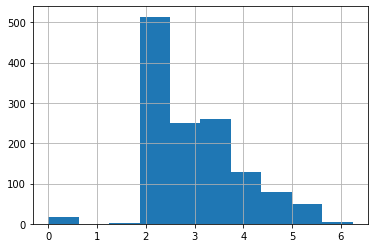

In [33]:
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

In [34]:
all_data.Pclass = all_data.Pclass.astype(str)## Scaling

## Dummy Encoding

In [35]:
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_letter','cabin_multiple','numeric_ticket','name_title','train_test']])

In [36]:
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_train.shape

(889, 33)

In [37]:
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)
X_test.shape

(418, 33)

In [38]:
y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

## Scaling

In [39]:
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()

In [40]:
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_AlmostRoyalty,name_title_Dona,name_title_Dr,name_title_Master,name_title_Military,name_title_Miss,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Royalty
0,-0.580261,0.480272,-0.445407,-0.896331,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.662297,0.480272,-0.445407,1.347870,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.269621,-0.479537,-0.445407,-0.815013,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.701127,-0.479537,-0.445407,-0.896331,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
416,-0.114301,-0.479537,-0.445407,-0.800632,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
417,-0.114301,0.480272,0.709647,0.179806,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [41]:
X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

In [42]:
y_train = all_data[all_data.train_test==1].Survived

In [43]:
print(y_train)

0      0.0
1      1.0
2      1.0
      ... 
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 889, dtype: float64


# Models

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn import tree # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model # LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

### K Neighbors Classifier

In [45]:
knc_clf = KNeighborsClassifier()
cv = cross_val_score(knc_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.79775281 0.85310734]
0.8144416936456548


### Random Forest Classifier

In [48]:
rfc_clf = RandomForestClassifier()
cv = cross_val_score(rfc_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.7752809  0.86516854 0.73595506 0.83050847]
0.8054275376118835


### Support Vector Machine

In [49]:
svm_clf = svm.SVC(kernel="linear",probability=True)
cv = cross_val_score(svm_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.82022472 0.81460674 0.7752809  0.84745763]
0.8155589411540658


### Logistic Regression

In [50]:
lr_clf = linear_model.LogisticRegression()
cv = cross_val_score(lr_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83146067 0.80898876 0.80898876 0.82022472 0.85310734]
0.8245540531962167


### Perceptron

In [51]:
p_clf = Perceptron()
cv = cross_val_score(p_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.71910112 0.69101124 0.74719101 0.74719101 0.83050847]
0.7470005713197486


###  Stochastic Gradient Descent Classifier

In [52]:
sgdc_clf = SGDClassifier(loss='modified_huber')
cv = cross_val_score(sgdc_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.71910112 0.79775281 0.61797753 0.78531073]
0.7357138322859138


### Decision Tree Classifier

In [97]:
dtc_clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_leaf= 3, min_samples_split= 2)
cv = cross_val_score(dtc_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84269663 0.80337079 0.83146067 0.79775281 0.8700565 ]
0.8290674792103092


### Gaussian Naive Bayes

In [54]:
gnb_clf = GaussianNB()
cv = cross_val_score(gnb_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.73595506 0.70224719 0.75842697 0.78651685 0.8079096 ]
0.758211134387101


### Ada Boosting Classifier

In [99]:
abc_clf = AdaBoostClassifier()
cv = cross_val_score(abc_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7752809  0.80337079 0.79775281 0.81460674 0.87570621]
0.8133434901288643


### Support Vector Classifier

In [56]:
# Winner
svc_clf = SVC(probability = True)
cv = cross_val_score(svc_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


### Extreme Gradient Boosting

In [57]:
xgbc_clf = xgb.XGBClassifier(use_label_encoder=False)
cv = cross_val_score(xgbc_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[23:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# Voting

In [58]:
from sklearn.ensemble import VotingClassifier
print("done")

done


In [67]:
# voting_clf = VotingClassifier(estimators = [('dtc_clf',dtc_clf),('knc_clf',knc_clf),('rfc_clf',rfc_clf),('svm_clf', svm_clf),('lr_clf',lr_clf),('sgdc_clf',sgdc_clf),('gnb_clf',gnb_clf),('abc_clf',abc_clf),('svc_clf',svc_clf),('xgbc_clf',xgbc_clf) ], voting = 'soft') 
# ^ Line for all Models (Except Perceptron)
voting_clf = VotingClassifier(estimators = [('lr_clf',lr_clf),('svc_clf',svc_clf),('xgbc_clf',xgbc_clf) ], voting = 'soft') 

In [68]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[00:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# Output 1

In [69]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': df_test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)

[00:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [70]:
sub_name = "submission" + randword()
base_submission.to_csv(f'{sub_name}.csv', index=False)
print(f'{sub_name} saved!')

submissionUBIQUITINATE saved!


## Just Winner

In [63]:
svc_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = svc_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': df_test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)

In [64]:
sub_name = "submission" + randword()
base_submission.to_csv(f'{sub_name}.csv', index=False)
print(f'{sub_name} saved!')

submissionOYSTERS saved!


# Model Tuning

In [74]:
def performance(clf, model):
    print(model + ": ")
    print(f'Best Score: {str(clf.best_score_)}')
    print(f'Best Params: {str(clf.best_params_)}')

### Logistic Regression

In [80]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression: 
Best Score: 0.8268139402018664
Best Params: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


### Support Vector Classifier

In [82]:
# Same as SVM
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC: 
Best Score: 0.8335555132355742
Best Params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


### Extreme Gradient Boosting

In [109]:
xgbc = xgb.XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgbc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\silib\AppData\Local\Programs\Python\Python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:49:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 
Best Score: 0.851513997333841
Best Params: {'colsample_bytree': 0.75, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.65}


### Support Vector Machine

In [85]:
# Same as SVC
svmc = svm.SVC(probability=True)

param_grid = {
    'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

clf_svmc = GridSearchCV(svmc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svmc = clf_svmc.fit(X_train_scaled,y_train)
performance(best_clf_svmc,'SVM')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
SVM: 
Best Score: 0.8335555132355742
Best Params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


### K Neighbors Classifier

In [86]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN: 
Best Score: 0.8279375357074843
Best Params: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


### Random Forest Classifier

In [87]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest: 
Best Score: 0.835809052244017
Best Params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 550}


<AxesSubplot:>

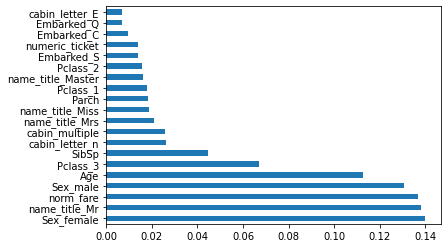

In [138]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

### Decision Tree Classifier

In [95]:
dtc = DecisionTreeClassifier()

param_grid = {
                "criterion": ['gini', 'entropy'], 
                "max_depth": [2,4,6,8,10,12],
                'min_samples_leaf': [2,3],
                'min_samples_split': [2,3]
             }


clf_dtc = GridSearchCV(dtc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_dtc = clf_dtc.fit(X_train_scaled,y_train)
performance(best_clf_dtc,'Decision Tree Classifier')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest: 
Best Score: 0.8290674792103092
Best Params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}


### Ada Boosting Classifier

In [106]:
# AdaBoost base estimator is DTC, so for best results, train a DTCLF beforehand with optimal parameters as done

dtc_clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_leaf= 3, min_samples_split= 2)
cv = cross_val_score(dtc_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84269663 0.80337079 0.83146067 0.79775281 0.8700565 ]
0.8290674792103092


In [107]:
abc = AdaBoostClassifier(base_estimator=dtc_clf)

param_grid = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

clf_abc = GridSearchCV(abc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_abc = clf_abc.fit(X_train_scaled,y_train)
performance(best_clf_abc,'Ada Boost Classifier')

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Ada Boost Classifier: 
Best Score: 0.8380435472608392
Best Params: {'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.1, 'n_estimators': 50}


## Retrain with tuned Hyperparameters

### Logistic Regression

In [139]:
lr_clf = linear_model.LogisticRegression(C= 1.623776739188721, max_iter= 2000, penalty= 'l1', solver= 'liblinear')
cv = cross_val_score(lr_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83146067 0.81460674 0.80337079 0.82022472 0.86440678]
0.8268139402018664


### Support Vector Classifier

In [140]:
svc_clf = SVC(probability = True, C= 1, gamma= 0.1, kernel= 'rbf')
cv = cross_val_score(svc_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


### K Neighbors Classifier

In [141]:
knc_clf = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 7, p= 2, weights= 'uniform')
cv = cross_val_score(knc_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.8258427  0.81460674 0.86440678]
0.8279375357074843


### Extreme Gradient Boosting

In [142]:
xgbc_clf = xgb.XGBClassifier(random_state=1, use_label_encoder=False, colsample_bytree= 0.75, gamma= 1, learning_rate= 0.5, max_depth= None, min_child_weight= 0.01, n_estimators= 500, reg_alpha= 1, reg_lambda= 5, sampling_method= 'uniform', subsample= 0.65)
cv = cross_val_score(xgbc_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[05:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Random Forest Classifier

In [143]:
rfc_clf = RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= 20, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 550)
cv = cross_val_score(rfc_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80337079 0.87078652 0.80337079 0.85875706]
0.8324255697327493


### Decision Tree Classifier

In [144]:
dtc_clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_leaf= 3, min_samples_split= 2)
cv = cross_val_score(dtc_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84269663 0.80337079 0.83146067 0.79775281 0.8700565 ]
0.8290674792103092


### Ada Boosting Classifier

In [145]:
ada_dtc_clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 10, min_samples_split= 2)
cv = cross_val_score(ada_dtc_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74719101 0.78651685 0.81460674 0.75842697 0.79661017]
0.7806703485050467


In [146]:
abc_clf = AdaBoostClassifier(base_estimator= ada_dtc_clf, learning_rate= 0.1, n_estimators= 50)
cv = cross_val_score(abc_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83707865 0.82022472 0.85393258 0.82022472 0.85875706]
0.8380435472608392


# More Voting

In [162]:
# voting_clf = VotingClassifier(estimators = [('dtc_clf',dtc_clf),('knc_clf',knc_clf),('rfc_clf',rfc_clf),('svm_clf', svm_clf),('lr_clf',lr_clf),('sgdc_clf',sgdc_clf),('gnb_clf',gnb_clf),('abc_clf',abc_clf),('svc_clf',svc_clf),('xgbc_clf',xgbc_clf) ], voting = 'soft') 
# ^ Line for all Models (Except Perceptron)
voting_clf = VotingClassifier(estimators = [('rfc_clf',rfc_clf),('svc_clf',svc_clf),('xgbc_clf',xgbc_clf), ('abc_clf',abc_clf)], voting = 'hard') 

In [163]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

[05:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:20:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:20:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:20:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [164]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': df_test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)

[05:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [165]:
sub_name = "submission" + randword()
base_submission.to_csv(f'{sub_name}.csv', index=False)
print(f'{sub_name} saved!')

submissionHYDROGENIZATION saved!


## Just Winner

In [167]:
abc_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = abc_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': df_test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)

In [168]:
sub_name = "submission" + randword()
base_submission.to_csv(f'{sub_name}.csv', index=False)
print(f'{sub_name} saved!')

submissionUMBRIEL saved!
